In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv'
df = pd.read_csv(file_path)

In [22]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


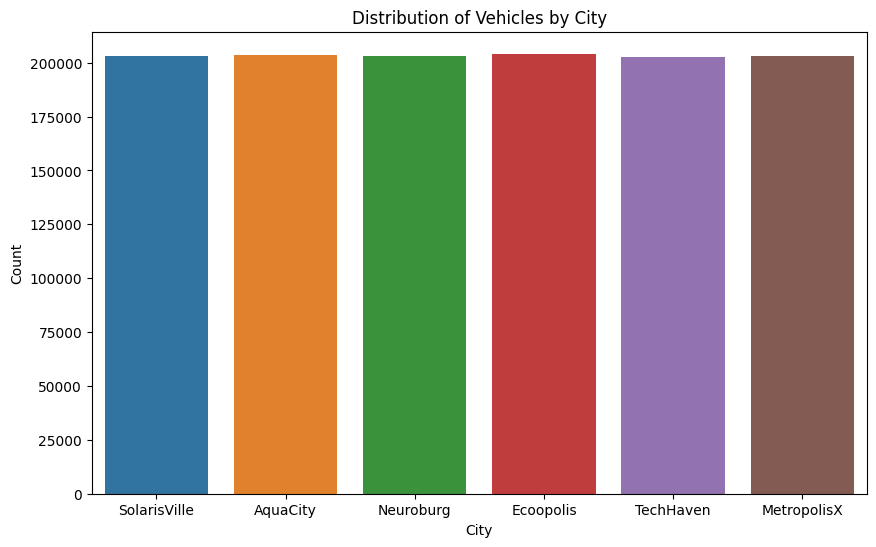

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Distribution of Vehicles by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

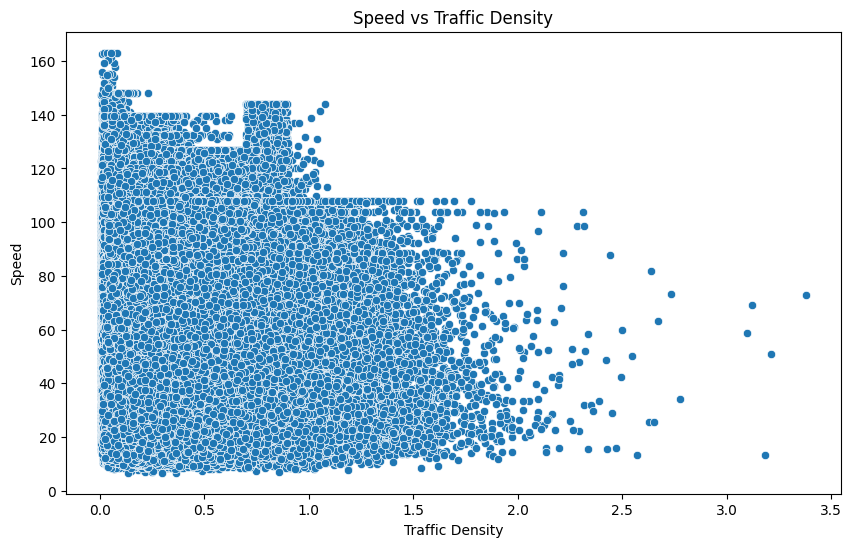

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Density', y='Speed', data=df)
plt.title('Speed vs Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Speed')
plt.show()

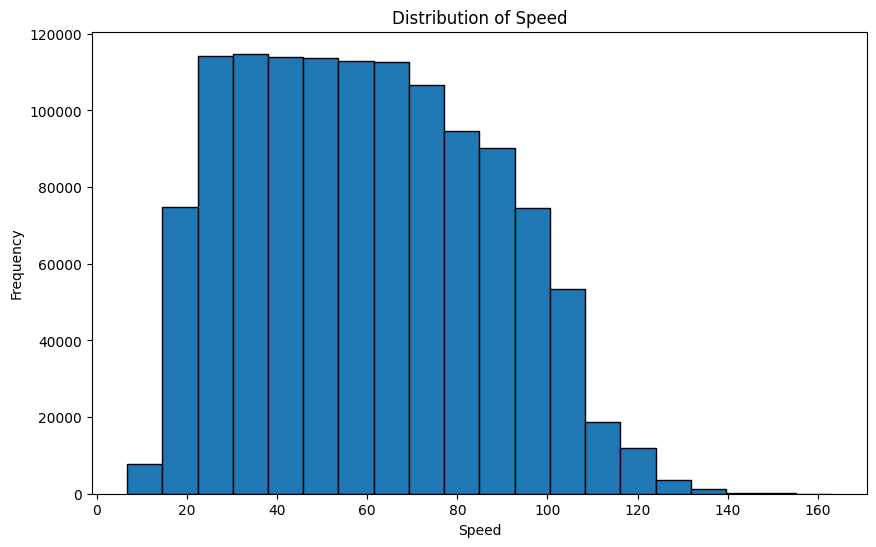

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Speed'], bins=20, edgecolor='black')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

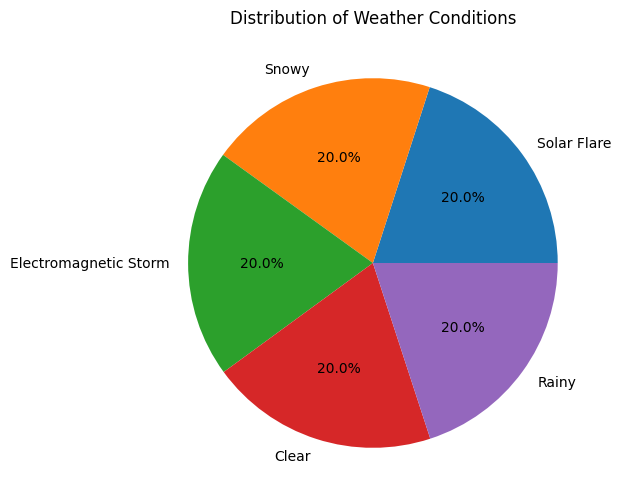

In [26]:
plt.figure(figsize=(10, 6))
df['Weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Weather Conditions')
plt.ylabel('')
plt.show()

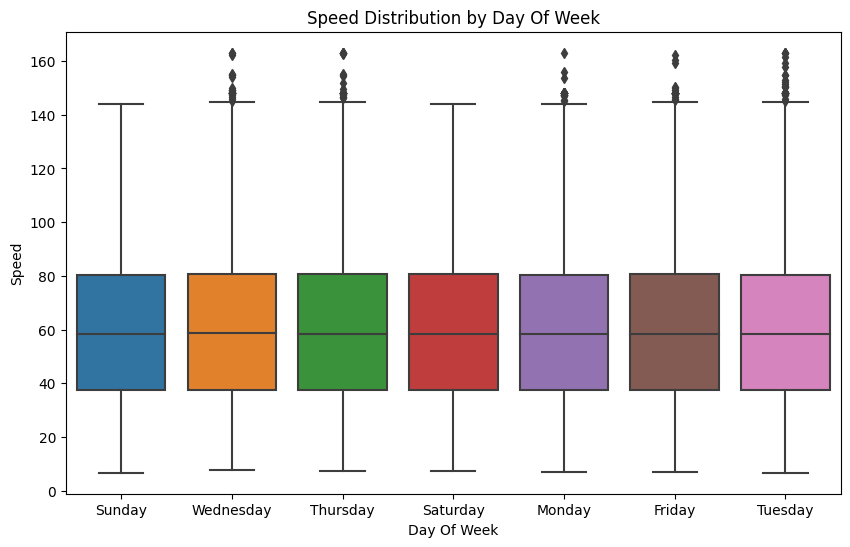

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day Of Week', y='Speed', data=df)
plt.title('Speed Distribution by Day Of Week')
plt.xlabel('Day Of Week')
plt.ylabel('Speed')
plt.show()

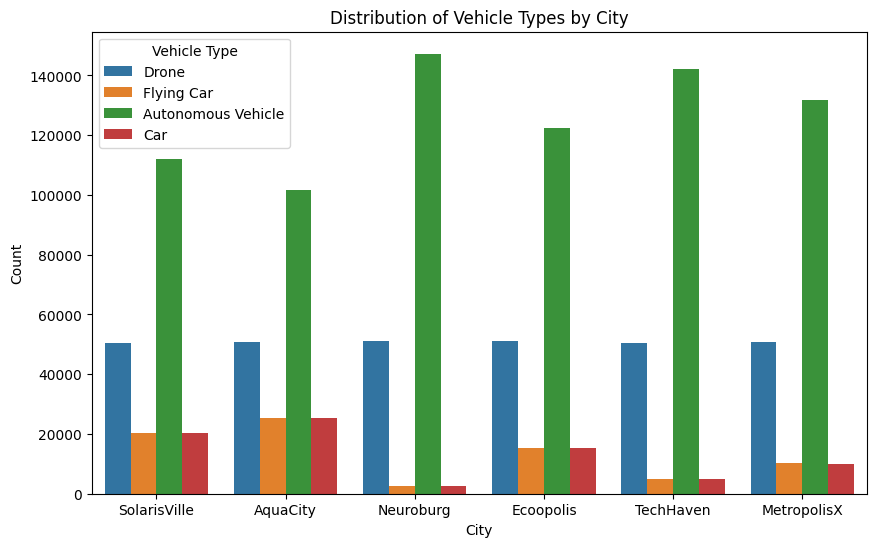

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Vehicle Type', data=df)
plt.title('Distribution of Vehicle Types by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Vehicle Type')
plt.show()


In [29]:
# Average Speed by Weather Condition
average_speed_by_weather = df.groupby('Weather')['Speed'].mean().reset_index()
print("Average Speed by Weather Condition:")
print(average_speed_by_weather)

# Average Energy Consumption by Vehicle Type
average_energy_by_vehicle = df.groupby('Vehicle Type')['Energy Consumption'].mean().reset_index()
print("\nAverage Energy Consumption by Vehicle Type:")
print(average_energy_by_vehicle)

# Peak Hour Analysis
peak_hour_speed = df.groupby('Is Peak Hour')['Speed'].mean()
peak_hour_energy = df.groupby('Is Peak Hour')['Energy Consumption'].mean()
print("\nPeak Hour Analysis - Speed:")
print(peak_hour_speed)
print("\nPeak Hour Analysis - Energy Consumption:")
print(peak_hour_energy)

# Traffic Density Impact
traffic_density_speed = df.groupby('Traffic Density')['Speed'].mean().reset_index()
traffic_density_energy = df.groupby('Traffic Density')['Energy Consumption'].mean().reset_index()
print("\nTraffic Density Impact - Speed:")
print(traffic_density_speed)
print("\nTraffic Density Impact - Energy Consumption:")
print(traffic_density_energy)


Average Speed by Weather Condition:
                 Weather      Speed
0                  Clear  63.254530
1  Electromagnetic Storm  61.731798
2                  Rainy  56.062990
3                  Snowy  55.299739
4            Solar Flare  63.374996

Average Energy Consumption by Vehicle Type:
         Vehicle Type  Energy Consumption
0  Autonomous Vehicle           52.430057
1                 Car           62.569347
2               Drone           32.973153
3          Flying Car           71.741685

Peak Hour Analysis - Speed:
Is Peak Hour
0    59.522456
1    62.252293
Name: Speed, dtype: float64

Peak Hour Analysis - Energy Consumption:
Is Peak Hour
0    49.794158
1    47.664106
Name: Energy Consumption, dtype: float64

Traffic Density Impact - Speed:
       Traffic Density     Speed
0               0.0059  37.30140
1               0.0060  72.73460
2               0.0062  43.03400
3               0.0063  93.80970
4               0.0065  57.28875
...                ...       ...
142